<a href="https://colab.research.google.com/github/yadavvinay20306/Assignment-.1/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing the libraries

In [46]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data=pd.read_csv('/daily_csv.csv')


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#loading the datset

In [54]:
data.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


#data preprocessing

# checking null values and filling missing values

In [ ]:
data.isnull().any()

Date     False
Price     True
dtype: bool

In [55]:
data['Price'].fillna(data['Price'].mean(),inplace=True)

finding outliers

IQR=q3-q1,upperbound=q3+1.5*IQR,lowerbound=q1-1.5*IQR

In [56]:
IQR=data['Price'].quantile(0.75)-data['Price'].quantile(0.25)
upperbound=data['Price'].quantile(0.75)+1.5*IQR

In [57]:
IQR

2.58

In [58]:
Lowerbound=data['Price'].quantile(0.25)-1.5*IQR
Lowerbound

-1.21

In [59]:
upperbound=data['Price'].quantile(0.75)+1.5*IQR
upperbound

9.11

<Axes: ylabel='Price'>

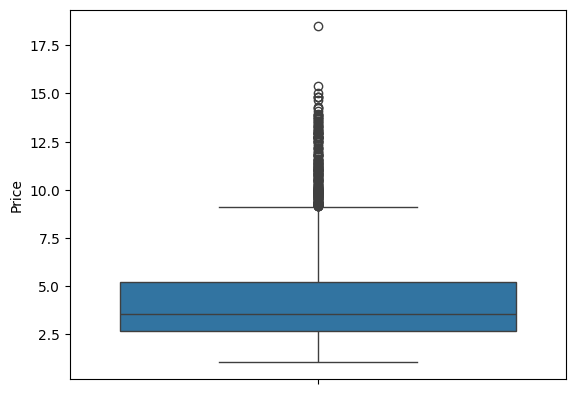

In [60]:
sns.boxplot(data['Price'])

In [61]:
x= data.Date
y=data.Price

#data visualisation


<function matplotlib.pyplot.show(close=None, block=None)>

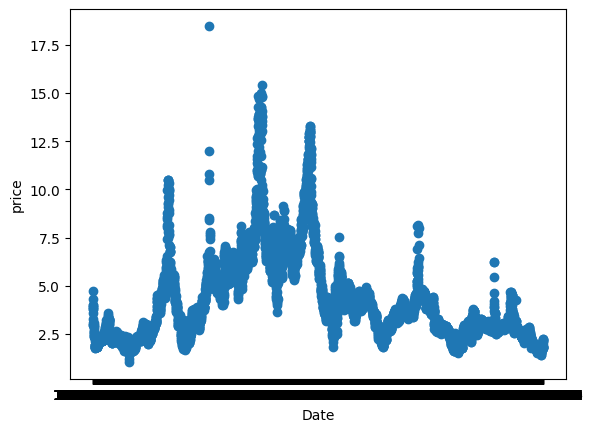

In [62]:
plt.scatter(x,y)
plt.xlabel("Date")
plt.ylabel("price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

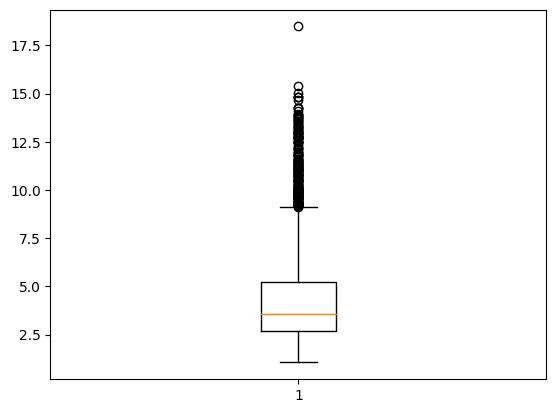

In [63]:
plt.boxplot(y)
plt.show

<Axes: ylabel='Price'>

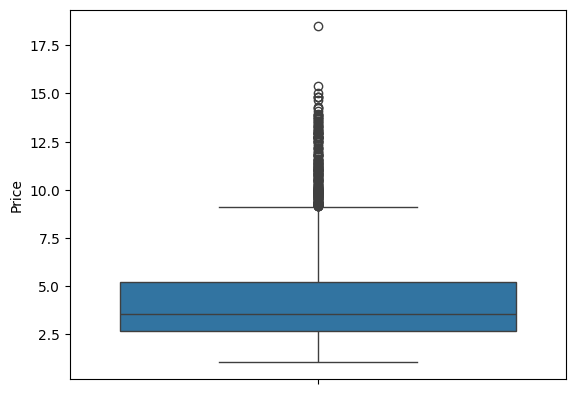

In [64]:
sns.boxplot(y)

<Axes: ylabel='Price'>

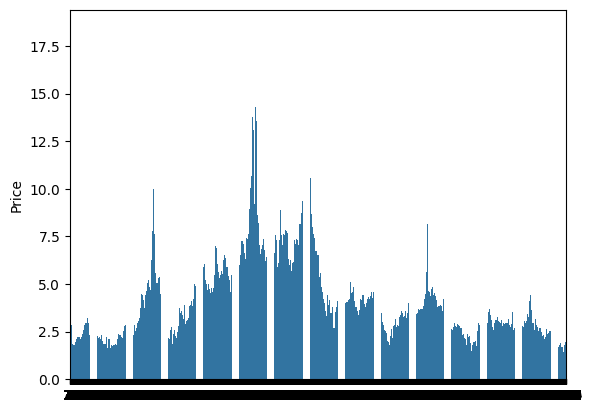

In [65]:
sns.barplot(y)

#Splitting the data


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#training the model with decision tree

In [69]:
import numpy as np
import pandas as pd  # Use pandas as pd, not np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# #loading the datset
data=pd.read_csv('/daily_csv.csv')

# Convert 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Extract numerical features from the datetime column if needed
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data=data.drop(['Date'],axis=1)

In [70]:
pd.get_dummies(data)

,Price,Year,Month,Day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,8,5
5934,2.26,2020,8,6
5935,2.15,2020,8,7
5936,2.18,2020,8,10


In [71]:
x_train=data.drop(['Price'],axis=1)
y_train=data['Price']
x_test=data.drop(['Price'],axis=1)
y_test=data['Price']

In [72]:
data['Price'].fillna(data['Price'].mean(),inplace=True)

In [73]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [74]:
y_pred=model.predict(x_test)
y_pred

array([3.82, 3.8 , 3.61, ..., 2.15, 2.18, 2.19])

In [75]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
accuracy

1.0

In [76]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f'Training R² score: {train_r2}')
print(f'Test R² score: {test_r2}')

Training R² score: 1.0
Test R² score: 1.0
